# UC Subreddit Upvote Prediction
### Analyzing Post Features and Engagement Across the UC Sub-Reddit System


## 1. Introduction

Reddit is one of the largest discussion and bonding platforms for college communities, especially UC's. Each UC campus' subreddit has specific cultures, trends, and content patterns. These communities are especially useful for students to voice their opinions or share a funny story!

Take this as an example:

<img src="images\Screenshot 2025-11-12 225912.png" width="800">

This project aims to analyze Reddit posts from various UC subreddits to predict how many upvotes a post will earn based on its content, metadata, and engagement features. We thought this was interesting because you can analyze individual UC subreddits to see the differences in culture communities.

However, a practical use being if you were a club trying to have people go to your event:
What factors influence your post being brought up to the front page?
Or, how you could get the most engagement out of your post?

### **Practical Terminology**

Terms and Descriptions for Common Reddit Terms:
| Term | Meaning | Relevance to the Project |
|------|---------|---------------------------|
| **Upvote** | A + positive vote indicating support | Our main target variable |
| **Downvote** | A - negative vote indicating disagreement | Affects score, (negatively) but not always included |
| **Score** | Upvotes − Downvotes | Sometimes differs from "upvotes" field |
| **Upvote Ratio** | % of total votes that are upvotes | Proxy for sentiment/approval |
| **Karma** | A user’s total upvote score on Reddit | Used as a predictor of credibility |
| **OP** | "Original Poster": the person who created the post | We track OP karma & account age |
| **Flair** | A label for the post ("Funny", "School", etc.) | Helps to categorize content |
| **Mods** | Subreddit moderators | They influence which posts stay or get removed |
| **NSFW** | “Not Safe For Work” content flag | Included as a binary feature |
| **Hot** | A listing sorted by engagement + time decay | Affects which posts we scraped |
| **Top** | A listing sorted purely by score | May bias dataset toward high-engagement posts |
| **New** | A listing sorted by recent posts | Influences visibility + upvotes |
| **Shitpost** | Low-effort or joke post (Usually funny) | Often gets lots of votes in college subreddits |
| **Copypasta** | A repeated block of text/meme | Signals humor, may influence upvote behavior |


### **Research Questions**

**RQ1 (Prediction):**  
Can we predict the number of upvotes a post receives based on title features, metadata, and subreddit characteristics?

**RQ2 (Explanation):**  
Which factors such as title length, sentiment, posting time, media presence, and subreddit size have the strongest influence on upvote counts?

The goal is to combine exploratory analysis and machine learning to uncover meaningful patterns in campus-level Reddit engagement.

## 2. Study Design & Data Description

We scraped posts from the *top*, *hot*, and *new* listings for nine UC subreddits using Reddit’s public JSON API.
However, since these listings contain high-visibility posts, this dataset may be biased toward successful or recent posts.

### Subreddits included:
- r/UCSD  
- r/UCLA  
- r/Berkeley  
- r/UCSantaBarbara  
- r/UCI  
- r/UCDavis  
- r/UCSC  
- r/ucr  
- r/ucmerced  

### Dataset Structure
| Category | Variable | Description |
|----------|----------|-------------|
| **Post Content** | `title` | Text of the post title |
| | `title_length` | Length of the title (engineered feature) |
| | `sentiment` | Sentiment score of the title |
| **Engagement Metrics** | `upvotes` | Number of upvotes |
| | `upvote_ratio` | Proportion of upvotes / total votes |
| | `num_comments` | Number of comments|
| **Post Metadata** | `listing` | Where the post was scraped from: (top/hot/new) |
| | `created_utc` | Timestamp of post |
| | `hour` | Hour of day post was made (engineered feature) |
| **Content Type** | `has_media` | Whether the post contains media (0/1) |
| | `is_video` | Whether the post is a video (0/1) |
| | `over_18` | NSFW flag (0/1) |
| | `link_flair_text` | Category assigned by the subreddit |
| **Author Information** | `author` | Username of the creator |
| | `author_premium` | Whether the author is a Reddit Premium user |
| | `author_karma`| Total karma of the author |
| **Subreddit Information** | `subreddit` | Name of the UC subreddit |
| | `subreddit_subscribers` | Number of subscribers to that subreddit |


### Potential Biases:
Our dataset is subject to several sources of bias. First, scraping from the top listing leads to an overrepresentation of already high-performing posts, which may distort our understanding of typical engagement. Additionally, subreddit sizes vary widely—for example, UC Berkeley has far more traffic than UC Merced—so posts naturally receive different levels of exposure across campuses. The timing of data collection also affects upvote counts, since recently posted content has had less time to accumulate engagement. Finally, we lack historical data for older posts, which limits our ability to analyze long-term trends or normalize upvote counts over time. (NEED TO EDIT OARAGRAPH)

These variables allow both behavioral and structural analysis of community engagement.


In [1]:
import pandas as pd
import os

folder_path = "reddit data"
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

df_list = []

for file in csv_files:
    path = os.path.join(folder_path, file)
    try:
        temp = pd.read_csv(path, on_bad_lines='skip')
        temp["campus"] = file.replace(".csv", "")
        df_list.append(temp)
        print(f"Loaded {file} successfully: {temp.shape}")
    except Exception as e:
        print(f"ERROR loading {file}: {e}")

df_all = pd.concat(df_list, ignore_index=True)
df_all.head()

Loaded ucr.csv successfully: (105, 24)
Loaded UCSantaBarbara.csv successfully: (102, 24)
Loaded ucmerced.csv successfully: (101, 24)
Loaded UCDavis.csv successfully: (103, 24)
Loaded Berkeley.csv successfully: (106, 24)
Loaded ucla.csv successfully: (111, 24)
Loaded UCSD.csv successfully: (108, 24)
Loaded UCSC.csv successfully: (101, 24)
Loaded UCI.csv successfully: (104, 24)


,subreddit,listing,title,author,upvotes,post_text,upvote_ratio,total_awards_received,score,edited,...,domain,link_flair_text,created_utc,subreddit_subscribers,author_premium,stickied,has_media,permalink,url,campus
0,ucr,top,SCOTTY YOU WRONGG FOR THIS,Hot_Bee4660,104,Nah cus tell me why i was hyped to see this an...,0.93,0,104,False,...,i.redd.it,NaN,1.762994e+09,31091,False,False,True,https://www.reddit.com/r/ucr/comments/1ovmkah/...,https://i.redd.it/k4ce98oz4x0g1.jpeg,ucr
1,ucr,top,anyone down to piss together??,Yo_momma_mine24,44,NaN,0.96,0,44,False,...,i.redd.it,Question,1.763046e+09,31091,False,False,True,https://www.reddit.com/r/ucr/comments/1ow3g9n/...,https://i.redd.it/hzqkxjq0i11g1.jpeg,ucr
2,ucr,top,Sword fighting at the Bell Tower?,NotSoSpicyMemer,21,Saw people fighting with foam swords and shiel...,0.96,0,21,False,...,self.ucr,Question,1.762993e+09,31091,False,False,False,https://www.reddit.com/r/ucr/comments/1ovmb1x/...,https://www.reddit.com/r/ucr/comments/1ovmb1x/...,ucr
3,ucr,top,GUEST LECTURE WRISTBAND,EntertainmentFlat810,7,Hey guys!! I rsvp’d for the guest lecture tomo...,0.82,0,7,False,...,self.ucr,Question,1.763009e+09,31091,False,False,False,https://www.reddit.com/r/ucr/comments/1ovrzgz/...,https://www.reddit.com/r/ucr/comments/1ovrzgz/...,ucr
4,ucr,top,Movies,Carminebenajmin117,6,I like going to the riverside regal in the riv...,1.00,0,6,False,...,self.ucr,NaN,1.763008e+09,31091,False,False,False,https://www.reddit.com/r/ucr/comments/1ovrtr8/...,https://www.reddit.com/r/ucr/comments/1ovrtr8/...,ucr


In [2]:
df_all.columns


Index(['subreddit', 'listing', 'title', 'author', 'upvotes', 'post_text',
       'upvote_ratio', 'total_awards_received', 'score', 'edited',
       'num_comments', 'is_self', 'is_video', 'over_18', 'domain',
       'link_flair_text', 'created_utc', 'subreddit_subscribers',
       'author_premium', 'stickied', 'has_media', 'permalink', 'url',
       'campus'],
      dtype='object')

## 3. Exploratory Data Analysis (PT.1)

Before building any models, we first need to see the structure of the dataset and find any patterns in upvotes across UC subreddits. This helps us to see any early trends relevant to our research questions.

Some basic questions we had in mind are:

- How many posts did we collect across all UC campuses?
- Which subreddits have the most activity?
- How are upvotes distributed?
- Do different UC campuses show different upvote behaviors?

In [3]:
# We have about 941 rows of data scraped from the combined subreddits
df_all.shape

(941, 24)

In [4]:
# And about 100~ rows of data per campus!
df_all['campus'].value_counts()

campus
ucla              111
UCSD              108
Berkeley          106
ucr               105
UCI               104
UCDavis           103
UCSantaBarbara    102
ucmerced          101
UCSC              101
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

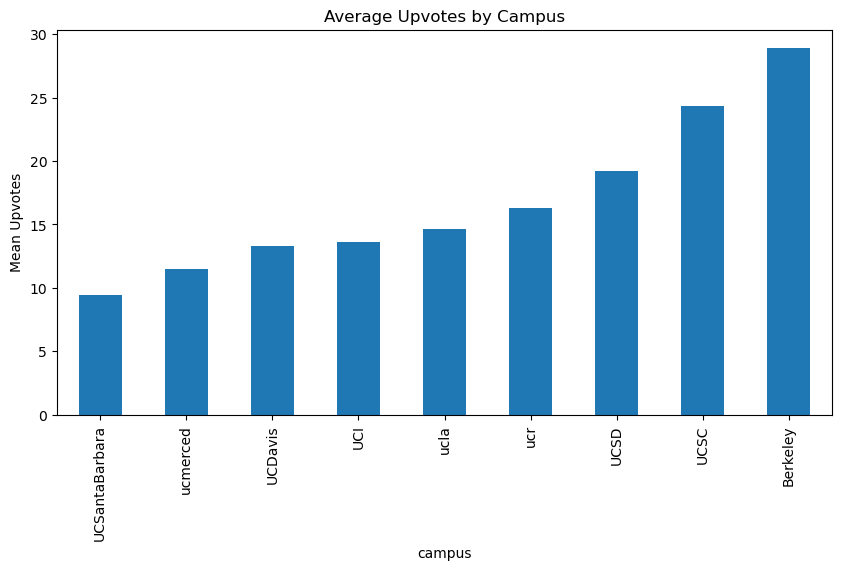

In [6]:
campus_avg = df_all.groupby('campus')['upvotes'].mean().sort_values()

plt.figure(figsize=(10,5))
campus_avg.plot(kind='bar')
plt.title("Average Upvotes by Campus")
plt.ylabel("Mean Upvotes")
plt.show()


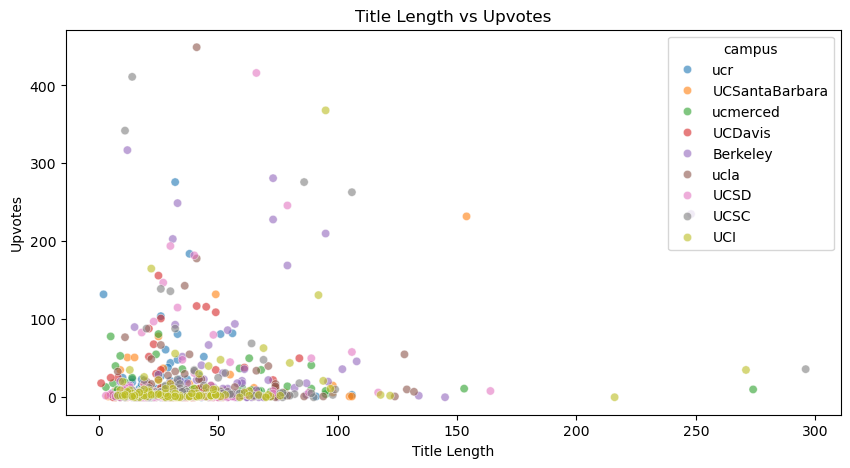

In [7]:
df_all['title_length'] = df_all['title'].astype(str).apply(len)

plt.figure(figsize=(10,5))
sns.scatterplot(data=df_all, x='title_length', y='upvotes', hue='campus', alpha=0.6)
plt.title("Title Length vs Upvotes")
plt.xlabel("Title Length")
plt.ylabel("Upvotes")
plt.show()

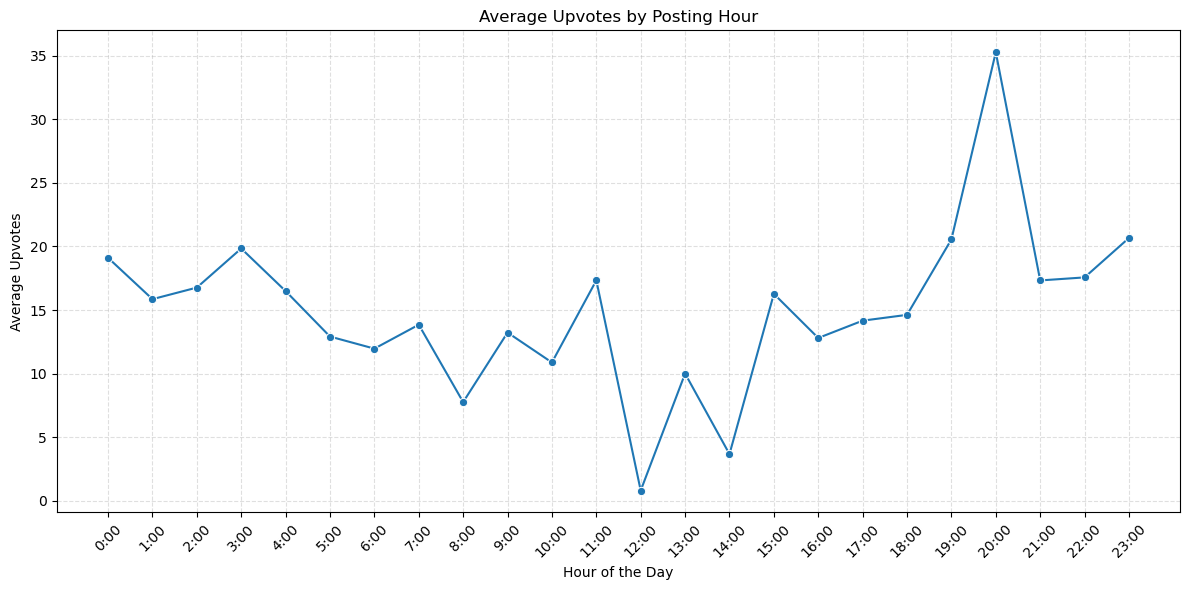

In [8]:
import numpy as np
import datetime 

# Compute average upvotes per hour
df_all['hour'] = pd.to_datetime(df_all['created_utc'], unit='s').dt.hour
hourly_avg = df_all.groupby('hour')['upvotes'].mean()

# Ensure every hour 0–23 exists
hourly_avg = hourly_avg.reindex(range(24), fill_value=0).reset_index()
hourly_avg.columns = ['hour', 'upvotes']

plt.figure(figsize=(12,6))

sns.lineplot(
    data=hourly_avg,
    x='hour',
    y='upvotes',
    marker='o',         # circle markers
    markers=True
)

# Tick labels for each hour
plt.xticks(
    ticks=range(24),
    labels=[f"{h}:00" for h in range(24)],
    rotation=45
)

plt.grid(True, linestyle='--', alpha=0.4)
plt.title("Average Upvotes by Posting Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Upvotes")
plt.tight_layout()
plt.show()

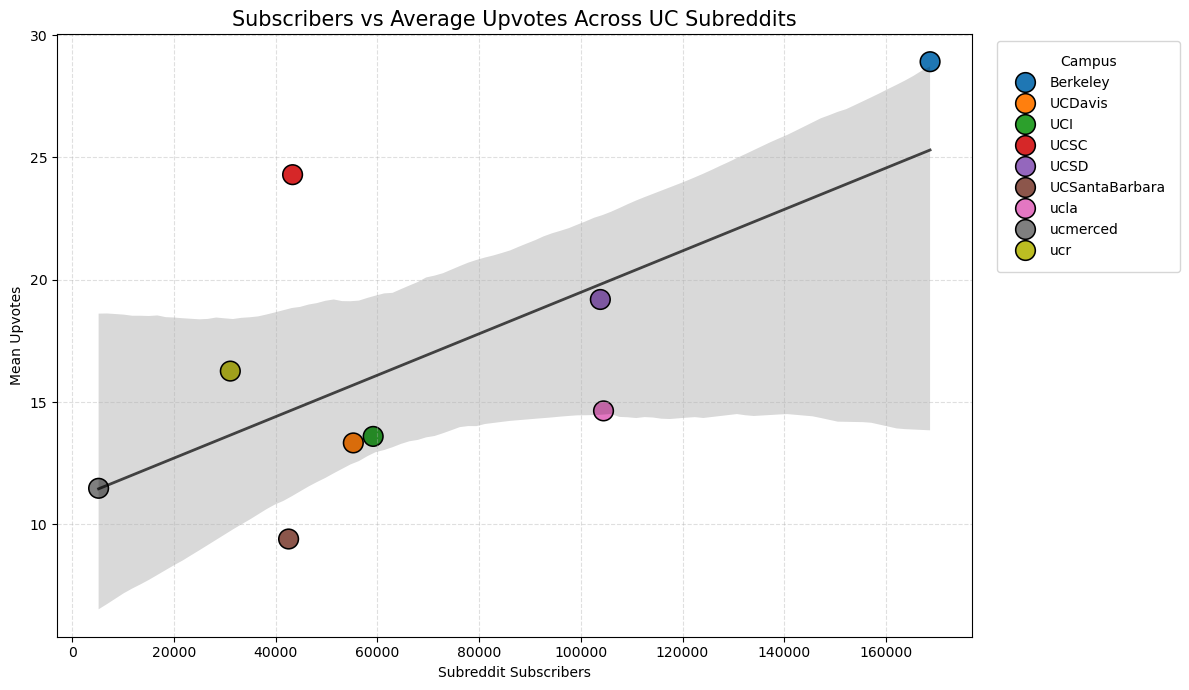

In [9]:
# Compute per-campus means
subreddit_stats = df_all.groupby('campus')[['subreddit_subscribers', 'upvotes']].mean().reset_index()

plt.figure(figsize=(12,7))

# Color-coded points by campus
sns.scatterplot(
    data=subreddit_stats,
    x='subreddit_subscribers',
    y='upvotes',
    hue='campus',
    palette='tab10',
    s=200,
    edgecolor='black'
)

# Regression line (overall trend)
sns.regplot(
    data=subreddit_stats,
    x='subreddit_subscribers',
    y='upvotes',
    scatter=False,
    color='black',
    line_kws={'linewidth':2, 'alpha':0.7}
)

plt.grid(True, linestyle='--', alpha=0.4)
plt.title("Subscribers vs Average Upvotes Across UC Subreddits", fontsize=15)
plt.xlabel("Subreddit Subscribers")
plt.ylabel("Mean Upvotes")

plt.legend(
    title="Campus",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderpad=1
)

plt.tight_layout()
plt.show()

In [16]:
df_all[:3].T

,0,1,2
subreddit,ucr,ucr,ucr
listing,top,top,top
title,SCOTTY YOU WRONGG FOR THIS,anyone down to piss together??,Sword fighting at the Bell Tower?
author,Hot_Bee4660,Yo_momma_mine24,NotSoSpicyMemer
upvotes,104,44,21
post_text,Nah cus tell me why i was hyped to see this an...,NaN,Saw people fighting with foam swords and shiel...
upvote_ratio,0.93,0.96,0.96
total_awards_received,0,0,0
score,104,44,21
edited,False,False,False


In [28]:
fig1 = px.histogram(df_all, x='upvotes', nbins=50, title='Distribution of Upvotes')
fig1.show()

#Given the skewed distribution of upvotes, it would be a good idea to look at the log-transformed upvotes instead

In [21]:
df_all.groupby(['has_media'])['upvotes'].mean()

has_media
False    12.753864
True     51.040000
Name: upvotes, dtype: float64

In [ ]:
observed_diff = df_all[df_all['has_media']==True]['upvotes'].mean() - df_all[df_all['has_media']==False]['upvotes'].mean()


n = 5000
diffs = []

for _ in range(n):
    shuffled = df_all['has_media'].sample(frac=1, replace=False).reset_index(drop=True)
    diff = df_all[shuffled==True]['upvotes'].mean() - df_all[shuffled==False]['upvotes'].mean()
    diffs.append(diff)

p_value = np.mean(np.array(diffs) >= observed_diff)

observed_diff, p_value

(np.float64(38.286135552913194), '0.0000000000')

In [39]:
fig2 = px.histogram(diffs, nbins=50,
                   title=f'Permutation Test: Upvotes Difference by Media Presence',
                   labels={'value':'Difference in Means (Media - No Media)'})


fig2.add_vline(x=observed_diff, line_width=3, line_color='red')


fig2.show()